In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

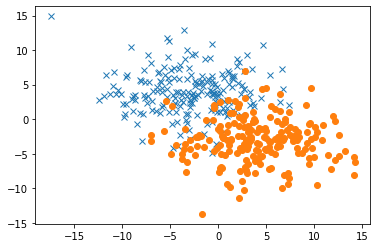

(200, 3)
(200, 3)
[[ -5.27751767   4.38151707   1.        ]
 [-17.43484886  14.90020837   1.        ]
 [ -6.91770348   1.2541847    1.        ]]
[[-2.37737077 -5.12529039 -1.        ]
 [ 2.98587243 -4.31859306 -1.        ]
 [ 3.06963635 -3.26987566 -1.        ]]
(400, 3)


In [ ]:
mean_1 = np.array([-3,4]).T
mean_2 = np.array([4,-3]).T

cov = np.array([[16,0],[0,9]])

dset1 = np.zeros([200,3])
dset2 = np.zeros([200,3])

dset1[:,0], dset1[:,1] = np.random.multivariate_normal(mean_1, cov,200).T
dset1[:,2] = int(1)
dset2[:,0], dset2[:,1] = np.random.multivariate_normal(mean_2,cov,200).T
dset2[:,2] = -int(1)
plt.plot(dset1[:,0], dset1[:,1], 'x')
plt.plot(dset2[:,0], dset2[:,1], 'o')

# plt.axis('equal')
plt.show()

print(dset1.shape)
print(dset2.shape)
print(dset1[:3,:])
print(dset2[:3,:])

train_set = np.vstack((dset1,dset2))
print(train_set.shape)

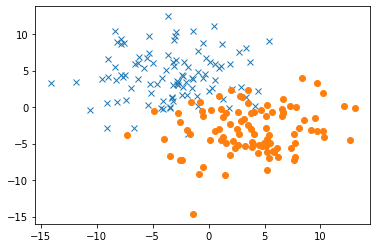

(100, 3)
(100, 3)
[[ 1.92898529  5.93796739  1.        ]
 [-2.35350563  4.41262036  1.        ]
 [-2.85006281  3.63082331  1.        ]]
[[-1.53496284  0.63109967 -1.        ]
 [ 9.71484288 -3.24729587 -1.        ]
 [ 9.53199389 -1.48549166 -1.        ]]
(200, 3)


In [ ]:
dset1 = np.zeros([100,3])
dset2 = np.zeros([100,3])

dset1[:,0], dset1[:,1] = np.random.multivariate_normal(mean_1, cov,100).T
dset1[:,2] = int(1)
dset2[:,0], dset2[:,1] = np.random.multivariate_normal(mean_2,cov,100).T
dset2[:,2] = -int(1)
plt.plot(dset1[:,0], dset1[:,1], 'x')
plt.plot(dset2[:,0], dset2[:,1], 'o')

# plt.axis('equal')
plt.show()

print(dset1.shape)
print(dset2.shape)
print(dset1[:3,:])
print(dset2[:3,:])

test_set = np.vstack((dset1,dset2))
print(test_set.shape)

In [ ]:
'''Stochastic'''
def perceptron_train(X, Y, Xt, Yt, Z, lr, itrs):
    # print('before',X.shape)
    intercept = np.ones((len(X),1))
    X = np.hstack((intercept, X))
    # print('after',X.shape)
    # print(X[:3])
    W = np.zeros(len(X[0]))
    yhat = np.ones(len(Y))
    err = np.ones(len(Y))
    cost, t_cost = [], []
    it = 0
    while it < itrs:                             
        for i in range(0, len(X)):                 
            f = np.dot(X[i], W)          
            # activation 
            if Y[i]*f > Z:                               
                yh = Y[i]                               
            else:                                   
                yh = 0.
            yhat[i] = yh
            # updating weights
            W = W + lr*(Y[i]-yh)*X[i]
        it += 1

        # sum-of-squared errors
        err = np.square(Y-yhat)
        cost.append(0.5*np.sum(err))

        # errors on test set
        t_yh = perceptron_test(Xt,W,Z)
        t_err = np.square(Yt-t_yh)
        t_cost.append(0.5*np.sum(t_err))

    return np.array(W), np.array(cost), np.array(t_cost)


def perceptron_test(X, W, Z):
    intercept = np.ones((len(X),1))
    X = np.hstack((intercept, X))
    y_pred = []
    for i in range(len(X)):
        f = np.dot(X[i], W)   

        if f > Z:                               
            yh = 1                               
        else:                                   
            yh = -1
        y_pred.append(yh)
    return y_pred

Weights: [-2.39000000e-05 -2.70328662e-04  4.49327456e-04]
Training accuracy: 0.8775
Testing accuracy 0.92


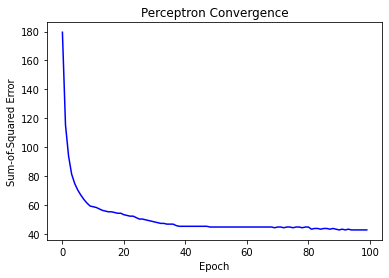

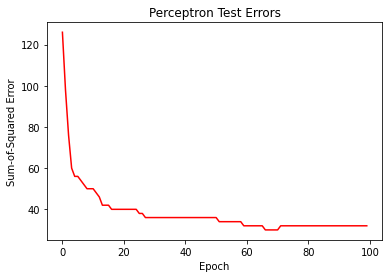

In [ ]:
thres = 0.001 
lr = 0.0000001  
itrs = 100 

# print(train_set[:,2:].squeeze(1).shape)

W, J, t_J = perceptron_train(train_set[:,:2], train_set[:,2:].squeeze(1), test_set[:,:2], test_set[:,2:].squeeze(1), thres, lr, itrs)
print("Weights:",W)

plt.figure()
plt.plot(range(len(J)), J, 'b')
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')

plt.figure()
plt.plot(range(len(t_J)), t_J, 'r')
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Test Errors')

y_pred = perceptron_test(train_set[:,:2], W, thres)
print("Training accuracy:",accuracy_score(train_set[:,2:].squeeze(1), y_pred))

y_pred = perceptron_test(test_set[:,:2], W, thres)
print("Testing accuracy",accuracy_score(test_set[:,2:].squeeze(1), y_pred))

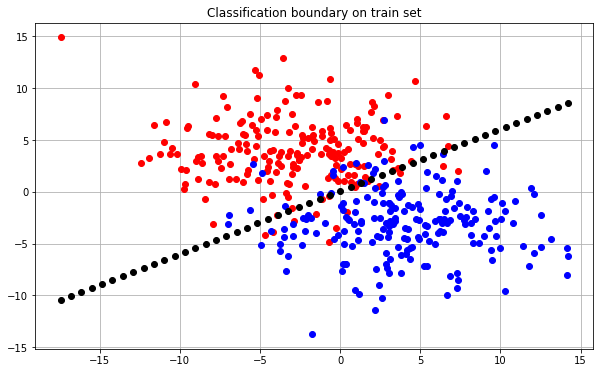

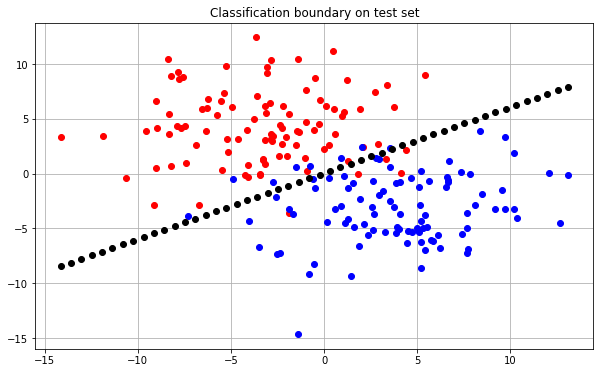

In [ ]:
def plot_data(inputs,targets,weights,title):
    plt.figure(figsize=(10,6))
    plt.grid(True)
    
    for input,target in zip(inputs,targets):
        plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

    for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]

        #y = mx+c, m is slope and c is intercept
        y = (slope*i) + intercept
        plt.title(title)
        plt.plot(i, y,'ko')

plot_data(train_set[:,:2],train_set[:,2],W,"Classification boundary on train set")

plot_data(test_set[:,:2],test_set[:,2],W,"Classification boundary on test set")

## Preprocessing data by standardization

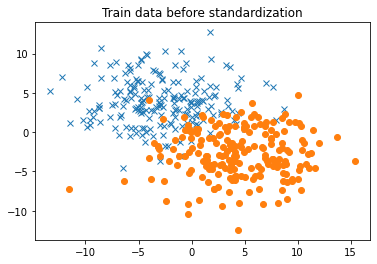

(200, 3)
(200, 3)
[[ -9.83978554   0.61478554   1.        ]
 [  1.60155489   4.47649931   1.        ]
 [-10.25308794   1.54214147   1.        ]]
[[ 6.2848192   1.96995375 -1.        ]
 [ 1.79000041 -4.23915203 -1.        ]
 [ 6.88647212 -3.22304923 -1.        ]]
(400, 3)


In [ ]:
mean_1 =np.array([-3,4]).T
mean_2 = np.array([4,-3]).T

cov = np.array([[16,0],[0,9]])

dset1 = np.zeros([200,3])
dset2 = np.zeros([200,3])

dset1[:,0], dset1[:,1] = np.random.multivariate_normal(mean_1, cov,200).T
dset1[:,2] = int(1)
dset2[:,0], dset2[:,1] = np.random.multivariate_normal(mean_2,cov,200).T
dset2[:,2] = -int(1)
plt.plot(dset1[:,0], dset1[:,1], 'x')
plt.plot(dset2[:,0], dset2[:,1], 'o')
plt.title("Train data before standardization")
plt.show()

print(dset1.shape)
print(dset2.shape)
print(dset1[:3,:])
print(dset2[:3,:])

train_set = np.vstack((dset1,dset2))
print(train_set.shape)

(400, 3)
[[-1.93676835 -0.01226663  1.        ]
 [ 0.17180323  0.85617496  1.        ]
 [-2.01293755  0.19628183  1.        ]]


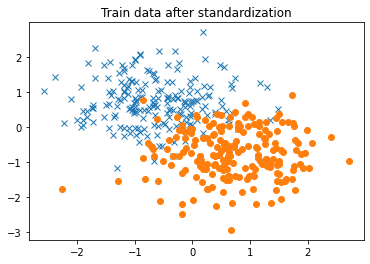

In [ ]:
std_train_set = np.zeros(train_set.shape)
# print(np.std(train_set[:,:2],axis=0).shape)
std_train_set[:,:2] = (train_set[:,:2] - np.mean(train_set[:,:2])) / np.std(train_set[:,:2],axis=0)
std_train_set[:,2] = train_set[:,2]

print(std_train_set.shape)
print(std_train_set[:3])

p_samples = std_train_set[std_train_set[:,2]==1]
n_samples = std_train_set[std_train_set[:,2]==-1]
plt.plot(p_samples[:,0], p_samples[:,1], 'x')
plt.plot(n_samples[:,0], n_samples[:,1], 'o')
plt.title("Train data after standardization")
plt.show()

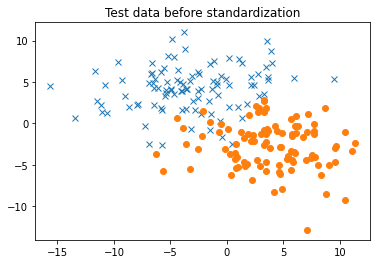

(100, 3)
(100, 3)
[[-3.84869221  4.70217948  1.        ]
 [-5.84010877  6.22526108  1.        ]
 [-4.00198562  3.93541342  1.        ]]
[[-5.65335242 -5.75702971 -1.        ]
 [-2.52625783 -3.04800446 -1.        ]
 [ 6.74053209 -1.69274706 -1.        ]]
(200, 3)


In [ ]:
mean_1 = np.array([-3,4]).T
mean_2 = np.array([4,-3]).T

cov = np.array([[16,0],[0,9]])

dset1 = np.zeros([100,3])
dset2 = np.zeros([100,3])

dset1[:,0], dset1[:,1] = np.random.multivariate_normal(mean_1, cov,100).T
dset1[:,2] = int(1)
dset2[:,0], dset2[:,1] = np.random.multivariate_normal(mean_2,cov,100).T
dset2[:,2] = -int(1)
plt.plot(dset1[:,0], dset1[:,1], 'x')
plt.plot(dset2[:,0], dset2[:,1], 'o')
plt.title("Test data before standardization")
plt.show()

print(dset1.shape)
print(dset2.shape)
print(dset1[:3,:])
print(dset2[:3,:])

train_set = np.vstack((dset1,dset2))
print(test_set.shape)

(200, 3)
[[ 0.28381843  1.12168292  1.        ]
 [-0.52744646  0.81100665  1.        ]
 [-0.62151306  0.65177351  1.        ]]


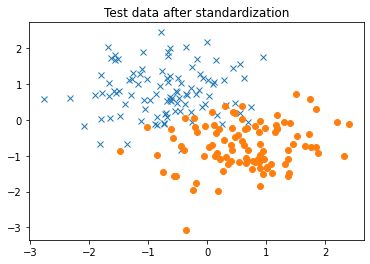

In [ ]:
std_test_set = np.zeros(test_set.shape)
# print(np.std(test_set[:,:2],axis=0).shape)
std_test_set[:,:2] = (test_set[:,:2] - np.mean(test_set[:,:2])) / np.std(test_set[:,:2],axis=0)
std_test_set[:,2] = test_set[:,2]

print(std_test_set.shape)
print(std_test_set[:3])

p_samples = std_test_set[std_test_set[:,2]==1]
n_samples = std_test_set[std_test_set[:,2]==-1]
plt.plot(p_samples[:,0], p_samples[:,1], 'x')
plt.plot(n_samples[:,0], n_samples[:,1], 'o')
plt.title("Test data after standardization")
plt.show()

Classification on standardized data
Weights: [-1.00000000e-05 -1.38233277e-03  2.01264494e-03]
Training accuracy: 0.88
Testing accuracy 0.915


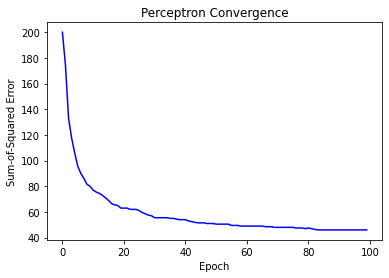

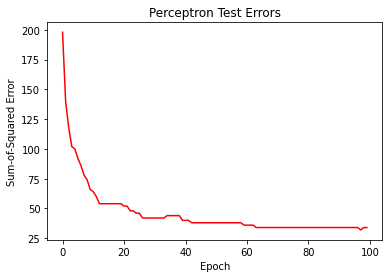

In [ ]:
thres = 0.001 
lr = 0.000001  
itrs = 100

# print(train_set[:,2:].squeeze(1).shape)

print("Classification on standardized data")

W, J, t_J = perceptron_train(std_train_set[:,:2], std_train_set[:,2:].squeeze(1), std_test_set[:,:2], std_test_set[:,2:].squeeze(1), thres, lr, itrs)
print("Weights:",W)

plt.figure()
plt.plot(range(len(J)), J, 'b')
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')

plt.figure()
plt.plot(range(len(t_J)), t_J, 'r')
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Test Errors')

y_pred = perceptron_test(std_train_set[:,:2], W, thres)
print("Training accuracy:",accuracy_score(std_train_set[:,2:].squeeze(1), y_pred))

y_pred = perceptron_test(std_test_set[:,:2], W, thres)
print("Testing accuracy",accuracy_score(std_test_set[:,2:].squeeze(1), y_pred))

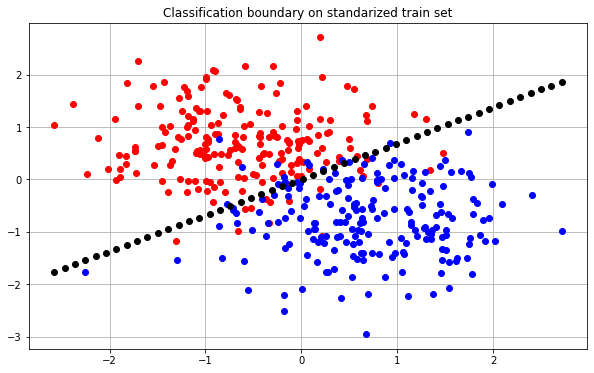

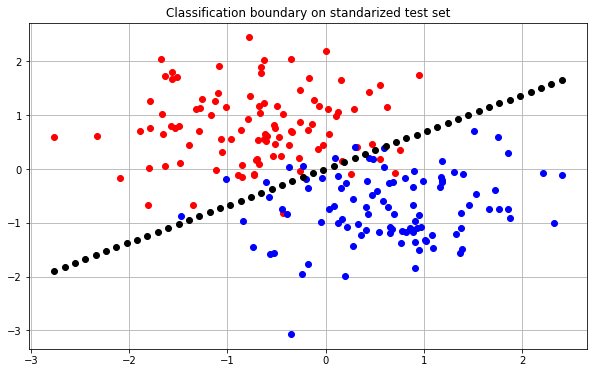

In [ ]:
plot_data(std_train_set[:,:2],std_train_set[:,2],W,"Classification boundary on standarized train set")

plot_data(std_test_set[:,:2],std_test_set[:,2],W,"Classification boundary on standarized test set")

Standardization of the dataset helps to converge faster.